<a href="https://colab.research.google.com/github/Tejeswar001/BootCamp-Jun-2024/blob/BootCampProgress/Analysis/Customer_churn_analysis_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer churn

`customer churn` refers to the phenomenon of customers stopping their subscriptions or relationships with a company.


If the value in the 'Churn' column is 'Yes', it means that the specific customer has churned - they have stopped using the company's services or products.


"churn" refers to the rate at which customers stop doing business with a company. It's essentially the opposite of customer retention.

For example, in a subscription-based service, churn happens when customers cancel their subscriptions.

High churn rates can be detrimental to a business as it indicates customer dissatisfaction and loss of revenue.

In the context of a telecommunications customer churn dataset, the columns "Partner" and "Dependents" likely refer to the following:

- Partner: Indicates whether the customer has a partner (spouse or significant other) living with them. The values would typically be "Yes" or "No".

- Dependents: Indicates whether the customer has any dependents (children or others) who rely on them. The values would also typically be "Yes" or "No".

## Import all necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

## Study Data

In [5]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


The `'tenure'` column in the customer churn CSV file represents the number of months a customer has stayed with the company. It's a key feature for understanding churn, as customers with longer tenure are often considered more loyal and less likely to leave.

## NULL values

In [8]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


0 null values in the csv file

In [9]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [10]:
int_cols = df.select_dtypes(include=['int64','float64']).columns
print(int_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


### DataType of TotalCharges

In [11]:
print(df['TotalCharges'].dtype)

object


- TotalCharges Should be float.
- So, Let's change it.

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Check the data type again

In [13]:
print(df['TotalCharges'].dtype)

float64


Now, Check for the null values

In [14]:
print(df['TotalCharges'].isnull().sum())

11


In [15]:
print(df[df['TotalCharges'].isnull()])

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

After studying the above output we can see the `tenure` column is of 0,

**Conclusion**
- *New Customers*: A `tenure` of 0 typically indicates customers who just signed up.
- *No Billing Cycle*: It's logical that new customers with `zero tenure` wouldn't have a 'TotalCharges' value yet, as they haven't completed a billing cycle.

In [16]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [17]:
print(df['TotalCharges'].isnull().sum())

0


## Outliers

### Identify Outliers in the Data

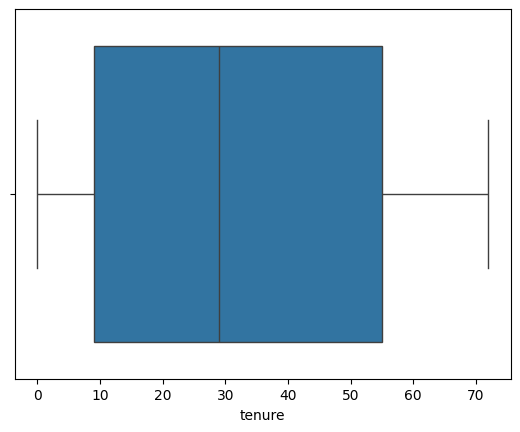

In [18]:
sns.boxplot(x=df['tenure'])
plt.show()

It's important to clarify whether values of `0 and 70` in the `'tenure'` column are actually outliers or just the minimum and maximum values in your dataset. Customers with 0 tenure might be new customers who just signed up, and customers with 70 months tenure might be your most loyal long-term customers.

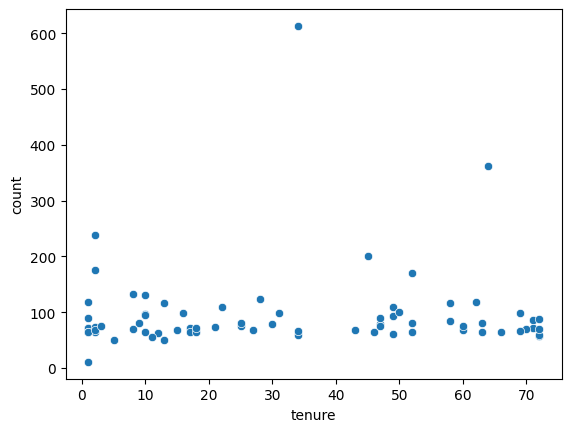

In [19]:
sns.scatterplot(x=df['tenure'], y=df['tenure'].value_counts())
plt.show()

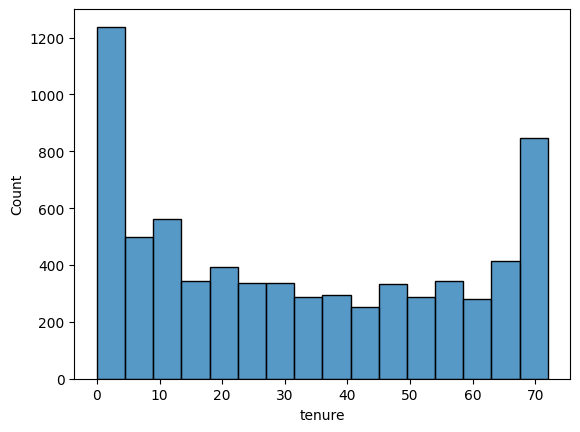

In [20]:
sns.histplot(df['tenure'])
plt.show()

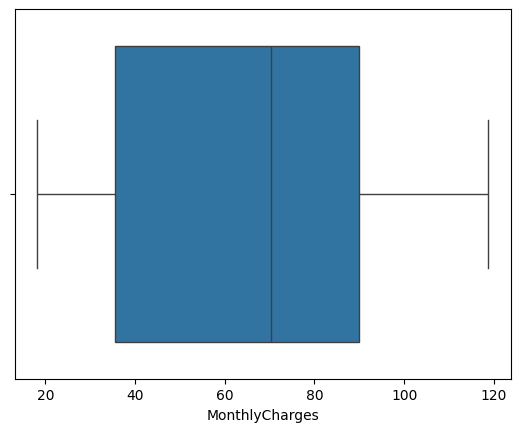

In [21]:
sns.boxplot(x=df['MonthlyCharges'])
plt.show()

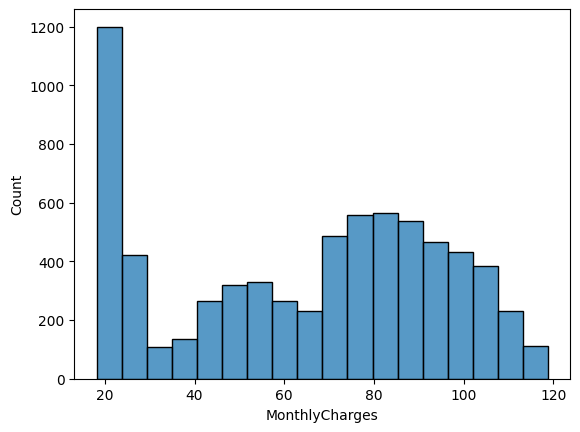

In [22]:
sns.histplot(df['MonthlyCharges'])
plt.show()

- As perthe histogram the count around 20 is high, perhaps 29.85 represents a basic plan

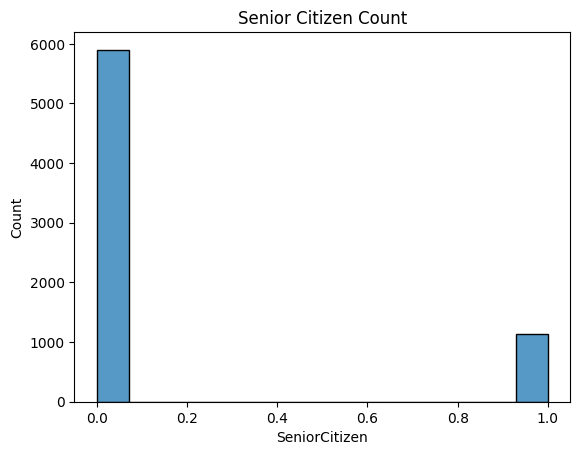

In [23]:
sns.histplot(df['SeniorCitizen'])
plt.title('Senior Citizen Count')
plt.show()

- Count of senior Citizens < Count of Non-Senior Citizens

# Analysis

## Univar Analysis

### Overall Churn Rate

In [48]:
total_customers = 5174 + 1869
churned_customers = 1869

overall_churn_rate = (churned_customers / total_customers) * 100
print("Overall Churn Rate: {:.1f}%".format(overall_churn_rate))

Overall Churn Rate: 26.5%


Univariate analysis is a statistical method that focuses on analyzing each variable in a dataset individually.

It involves examining the distribution of a single variable.

In [24]:
variables = df.columns
print(variables)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### Contract column analysis

In [25]:
contract_count = df['Contract'].value_counts()
print(contract_count)

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


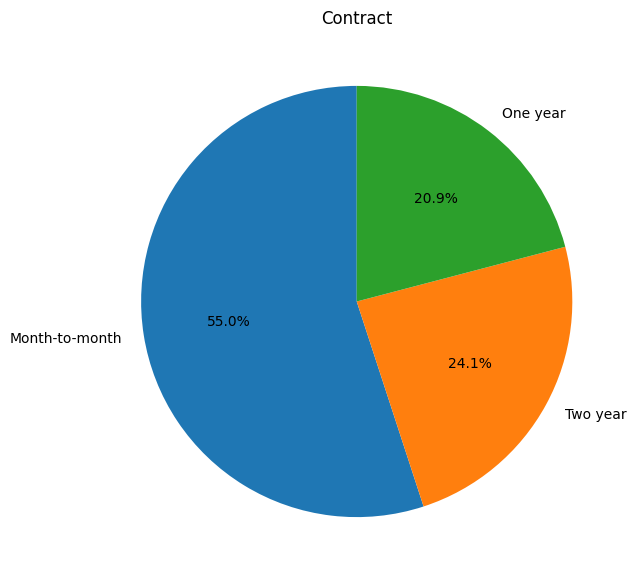

In [26]:
plt.figure(figsize=(10,7))
plt.pie(contract_count, labels=contract_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Contract')
plt.show()

**Conclusion**
- From the pie chart, we can say that `Month-to-month` is the popular contract and followed by `Two year` contract and `one year` contract

## Bivar Analysis

`Bivariate analysis` is a statistical method that examines the relationship between two variables. It explores if and how two variables are associated or correlated with each other.

In [27]:
variables = df.columns
print(variables)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### Gender column analysis

In [28]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

gender
Male      3555
Female    3488
Name: count, dtype: int64


Now, let's calculate the frequency of the gender who has `churned`(stoped using service).

### Gender vs Churn

In [29]:
churn_gender_count = df[df['Churn']=='Yes']['gender'].value_counts()
print(churn_gender_count)

gender
Female    939
Male      930
Name: count, dtype: int64


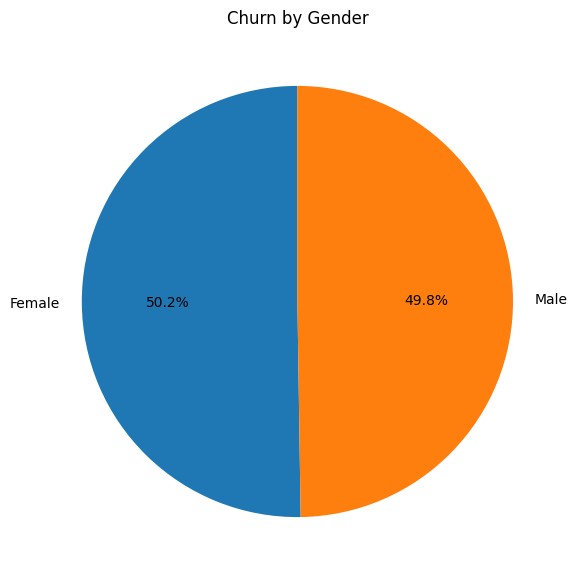

In [30]:
plt.figure(figsize=(10,7))
plt.pie(churn_gender_count, labels=churn_gender_count.index, autopct='%1.1f%%',startangle=90)
plt.title('Churn by Gender')
plt.show()

**Conclusion**
- There is no significant difference in the number of male and female customers, perhaps there is no bias.
- So, no gender specific churn.


### Payment Method vs Churn

`Objective`: Assess if the payment method affects customer churn.

In [31]:
print(df['PaymentMethod'].value_counts())

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


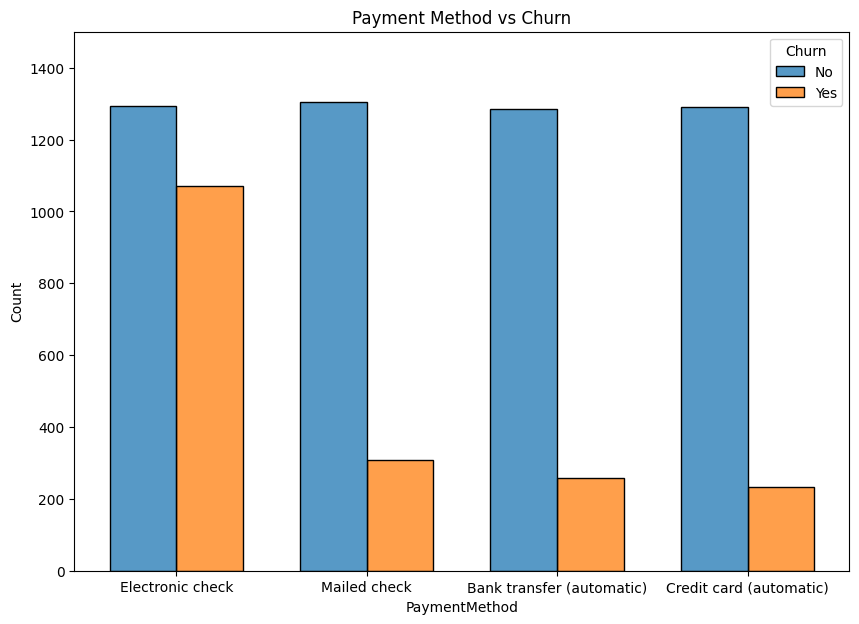

In [32]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='PaymentMethod',hue='Churn',multiple="dodge",shrink=.7)
plt.title('Payment Method vs Churn')
plt.ylim(0,1500)
plt.show()

**Conclusion**
- `Electronic check` payment method customers have higher churn.
- `Mailed check` payment method customers have lower churn.

### Senior citizen vs Churn

In [33]:
print(df['SeniorCitizen'].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


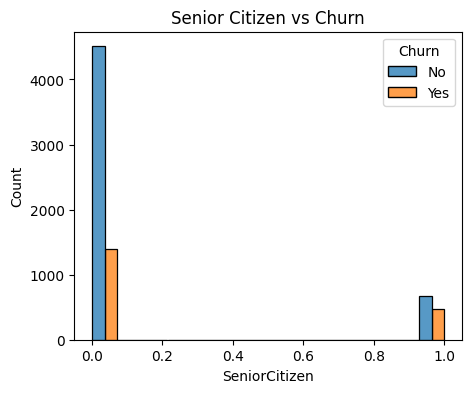

In [34]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,x='SeniorCitizen',hue='Churn',multiple="dodge",shrink=.999)
plt.title('Senior Citizen vs Churn')
plt.show()

> Let's find the percentage of senior citizens who are churned and who are not.

In [35]:
churned_seniors = df[df['SeniorCitizen']==1]['Churn'].value_counts()
print(churned_seniors)

Churn
No     666
Yes    476
Name: count, dtype: int64


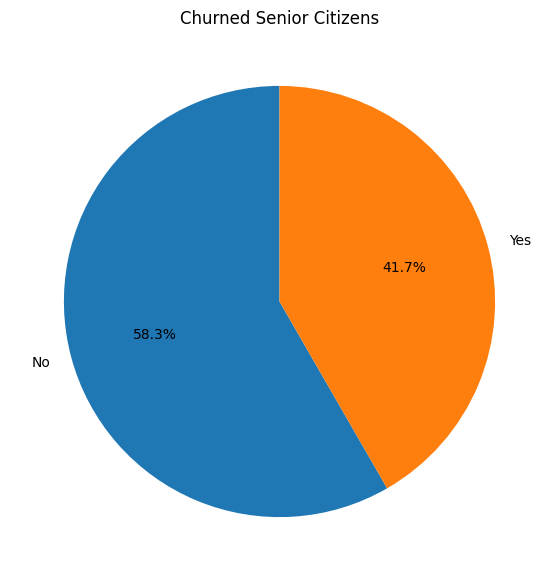

In [36]:
plt.figure(figsize=(10,7))
plt.pie(churned_seniors,labels=churned_seniors.index,autopct='%1.1f%%',startangle=90)
plt.title('Churned Senior Citizens')
plt.show()

**Conclusion**
- Almost `6 out 10` senior citizens continue to use the service.
- `However, the churn rate for seniors is still considerable.`The fact that over 40% of seniors churn indicates there might be specific factors affecting this group that need to be addressed.

### Phone Services vs Churn

Why Analyze Phone Service vs Churn?


**we conduct this analysis to examine the relationship between phone service and churn**
- we can determine if the phone service lack any significant factor driving customers to leave.
- Understanding the impact of phone services on churn can alter the services and meet the customer satisfaction.

**Let's talk about the `Benefits` of the analysis**
- We can focus upon the customer churn rates and the causing issues.
-  Retaining customers who might have churned due to lack of phone services can lead to increased revenue and customer lifetime value.

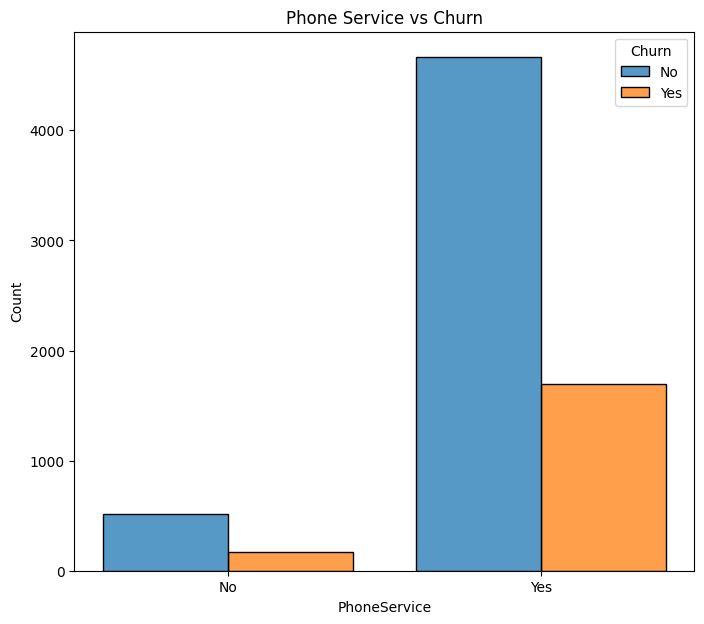

In [37]:
plt.figure(figsize=(8,7))
sns.histplot(x=df['PhoneService'],hue=df['Churn'],multiple="dodge",shrink=.8)
plt.title('Phone Service vs Churn')
plt.show()

**Now let's break the things up**
- "Let's analyze the churn behavior of customers who did not subscribe to phone services."
- "Similarly, let's examine the churn patterns among customers who opted for phone services."

In [38]:
churn_phone = df[df['PhoneService']=='Yes']['Churn'].value_counts()
print(churn_phone)

Churn
No     4662
Yes    1699
Name: count, dtype: int64


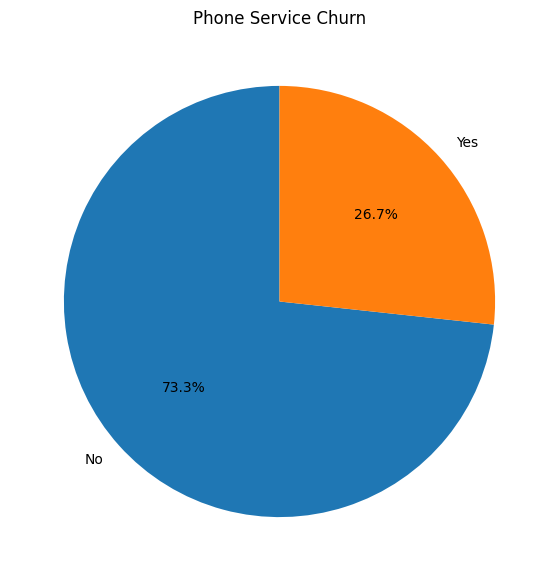

In [39]:
plt.figure(figsize=(8,7))
plt.pie(churn_phone,labels=churn_phone.index,autopct='%1.1f%%',startangle=90)
plt.title('Phone Service Churn')
plt.show()

In [40]:
nophone_churn = df[df['PhoneService']=='No']['Churn'].value_counts()
print(nophone_churn)

Churn
No     512
Yes    170
Name: count, dtype: int64


Text(0.5, 1.0, 'No Phone Service Churn')

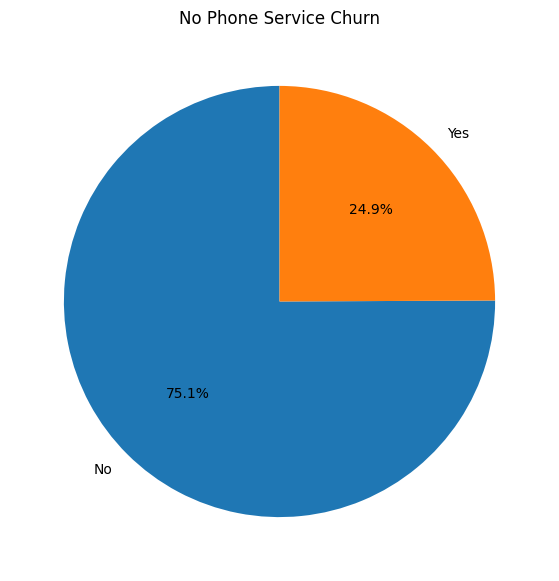

In [41]:
plt.figure(figsize=(8,7))
plt.pie(nophone_churn,labels=nophone_churn.index,autopct='%1.1f%%',startangle=90)
plt.title('No Phone Service Churn')

**Observation**:

 The percentage of customers who churned, appears to be similar for both those with and without phone service.

However, we cannot definitively conclude that phone service is not a factor influencing churn.

### Internet Services vs Churn

**Reasons for Churn Analysis (Internet Service)**:

- Determine if specific internet service types (DSL, Fiber optic, etc.) are correlated with higher churn rates.
- Identify potential issues with certain internet service offerings.
- Understand customer preferences and satisfaction levels regarding internet services.

**Benefits of this Analysis:**

- Targeted Improvements: Address specific pain points related to internet services to reduce churn.
- Customer Retention: Proactively retain customers who might be considering leaving due to dissatisfaction with internet services.
- Competitive Advantage: Offer superior internet service options compared to competitors.
- Increased Revenue: Reduce customer churn and potentially upsell higher-tier internet packages.

In [42]:
print(df['InternetService'].value_counts())

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


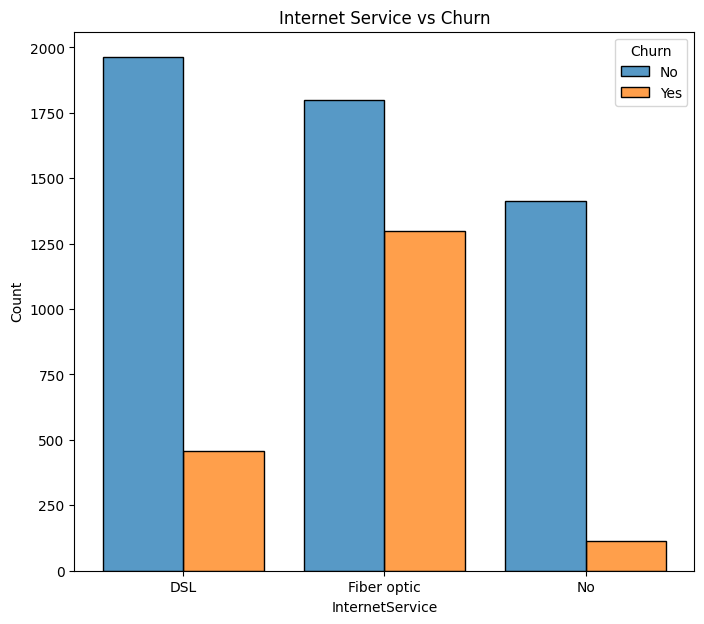

In [43]:
plt.figure(figsize=(8,7))
sns.histplot(x=df['InternetService'],hue=df['Churn'],multiple="dodge",shrink=.8)
plt.title('Internet Service vs Churn')
plt.show()

**From graph let's understand the relationship between 'Fiber Optic' Internet Service  and Customer churn**


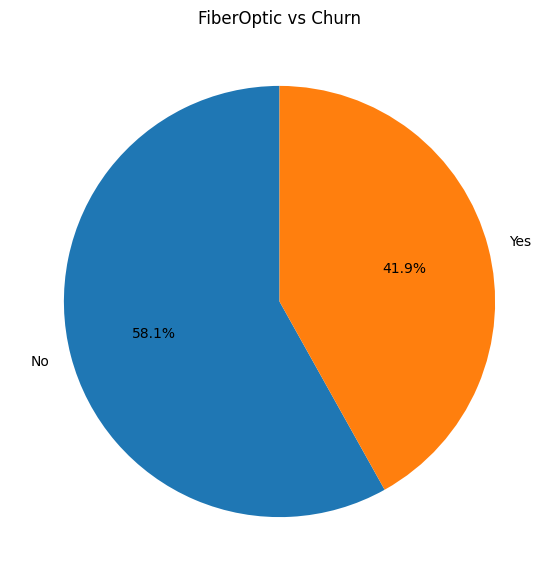

In [44]:
plt.figure(figsize=(8,7))
plt.pie(df[df['InternetService']=='Fiber optic']['Churn'].value_counts(),labels=df[df['InternetService']=='Fiber optic']['Churn'].value_counts().index,autopct='%1.1f%%',startangle=90)
plt.title('FiberOptic vs Churn')
plt.show()